In [1]:
import glob
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = "none"

In [2]:
results = {}
result_files = glob.glob('../results/*.pickle')

for file in result_files:
    results[os.path.basename(file).split('.')[0]] = pickle.load(open(file, 'rb'))

pca_df = pd.DataFrame(results['neuron_pca_mse'])
diffusion_df = pd.DataFrame(results['neuron_diffusion_mse'])
autoencoder_df = pd.DataFrame(results['neuron_autoencoder_mse'])

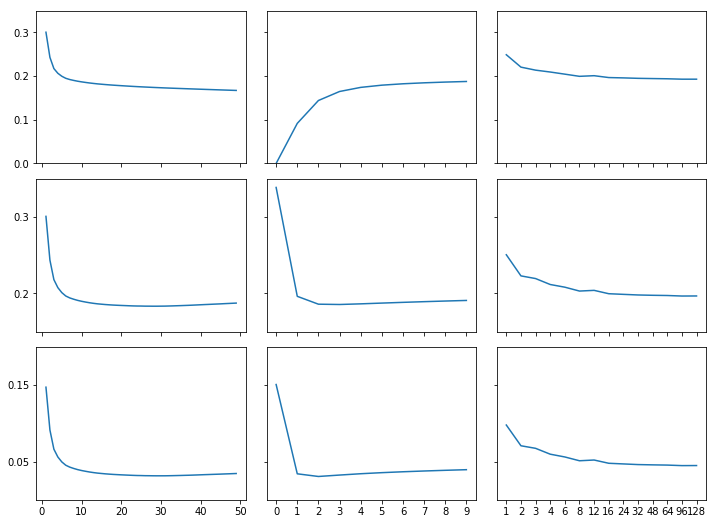

In [3]:
fig,ax = plt.subplots(
    3, 3, figsize=(12, 9), sharey='row', sharex='col', gridspec_kw={'wspace': 0.1, 'hspace': 0.1}
)

yscales = [
    ((0., 0.35), (0., 0.1, 0.2, 0.3)),
    ((0.15, 0.35), (0.2, 0.3)),
    ((0.0, 0.20), (0.05, 0.15)),
]

for i,df in enumerate((pca_df, diffusion_df, autoencoder_df)):
    x = df['param_range']
    for j,loss in enumerate(('re_loss', 'ss_loss', 'gt_loss')):
        if i == 0:
            ax[j,i].plot(x, df[loss])
        else:
            ax[j,i].plot(np.arange(len(x)), df[loss])
            ax[j,i].set_xticks(np.arange(len(x)))
            ax[j,i].set_xticklabels(x)

        ax[j,i].set_ylim(yscales[j][0])
        ax[j,i].set_yticks(yscales[j][1])
    
plt.savefig("../figures/Figure_1c_raw.svg")
plt.show()

In [4]:
sim_pca_df = pd.DataFrame(results['sim_pca_mse'])
sim_diffusion_df = pd.DataFrame(results['sim_diffusion_mse'])
# t=0 has very high error, omitting it to make the rest of the sweep visible
sim_diffusion_df = sim_diffusion_df[sim_diffusion_df['param_range'] > 0]
sim_autoencoder_df = pd.DataFrame(results['sim_autoencoder_mse'])

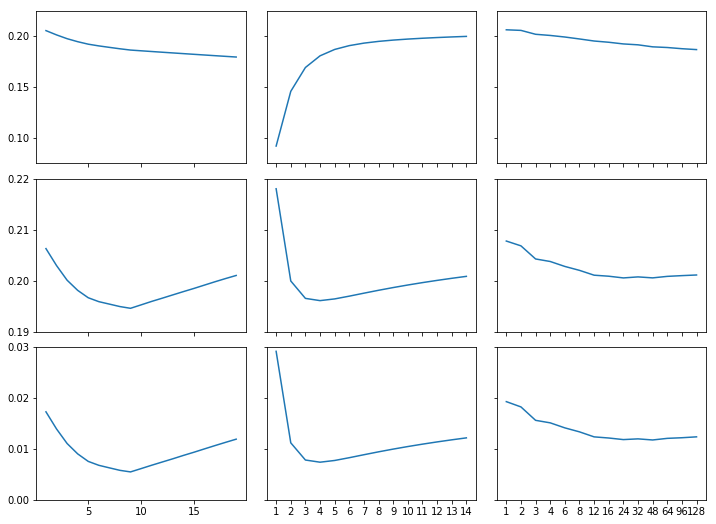

In [5]:
fig,ax = plt.subplots(
    3, 3, figsize=(12, 9), sharey='row', sharex='col', gridspec_kw={'wspace': 0.1, 'hspace': 0.1}
)

yscales = [
    ((0.075, 0.225), (0.1, 0.15, 0.2)),
    ((0.19, 0.22), (0.19, 0.20, 0.21, 0.22)),
    ((0.0, 0.03), (0.0, 0.01, 0.02, 0.03)),
]

for i,df in enumerate((sim_pca_df, sim_diffusion_df, sim_autoencoder_df)):
    x = df['param_range']
    for j,loss in enumerate(('re_loss', 'ss_loss', 'gt_loss')):
        if i == 0:
            ax[j,i].plot(x, df[loss])
        else:
            ax[j,i].plot(np.arange(len(x)), df[loss])
            ax[j,i].set_xticks(np.arange(len(x)))
            ax[j,i].set_xticklabels(x)

        ax[j,i].set_ylim(yscales[j][0])
        ax[j,i].set_yticks(yscales[j][1])

plt.savefig('../figures/Figure_S1_raw.svg')
plt.show()